**Desenvolvido Por :**


---


Arturo Bento Duran

Lais Kumasaka Santos

Maria Eduarda de Souza Araujo Pompiani Costa

Matheus Rodrigues Gomes

Raphael Bento von Zuben



**FUNÇÃO POR PARTES**

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [37]:
def funcao_por_partes(x, a1, b1, c1, a2, b2, c2, a3, b3, limite1, limite2):
    y_quadratica1 = a1 * x**2 + b1 * x + c1
    y_quadratica2 = a2 * x**2 + b2 * x + c2
    y_linear = a3 * x + b3

    return y_quadratica1, y_quadratica2, y_linear

In [38]:
# Função gerar o gráfico interativo
def plot_funcao_por_partes(a1=1, b1=0, c1=0, a2=1, b2=0, c2=0, a3=1, b3=0, limite1=-5, limite2=5):
    x1 = np.linspace(-100, limite1, 200)
    x2 = np.linspace(limite1, limite2, 200)
    x3 = np.linspace(limite2, 100, 200)

    # Calculando a função por partes
    y1, _, _ = funcao_por_partes(x1, a1, b1, c1, a2, b2, c2, a3, b3, limite1, limite2)
    _, y2, _ = funcao_por_partes(x2, a1, b1, c1, a2, b2, c2, a3, b3, limite1, limite2)
    _, _, y3 = funcao_por_partes(x3, a1, b1, c1, a2, b2, c2, a3, b3, limite1, limite2)

    # Gerando o gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(x1, y1, label='Função quadrática 1 (x <= limite1)', color='blue')
    plt.plot(x2, y2, label='Função quadrática 2 (limite1 < x <= limite2)', color='green')
    plt.plot(x3, y3, label='Função linear (x > limite2)', color='orange')

    # Linhas de limite
    plt.axvline(limite1, color='r', linestyle='--', label='Limite 1')
    plt.axvline(limite2, color='purple', linestyle='--', label='Limite 2')

    # Pontos de descontinuidade
    y_limite1_quadratica1 = a1 * limite1**2 + b1 * limite1 + c1
    y_limite1_quadratica2 = a2 * limite1**2 + b2 * limite1 + c2
    y_limite2_quadratica2 = a2 * limite2**2 + b2 * limite2 + c2
    y_limite2_linear = a3 * limite2 + b3

    if y_limite1_quadratica1 != y_limite1_quadratica2:
        plt.scatter([limite1], [y_limite1_quadratica1], color='blue', zorder=5)
        plt.scatter([limite1], [y_limite1_quadratica2], color='green', zorder=5)
        plt.text(limite1, y_limite1_quadratica1, f' ({limite1}, {round(y_limite1_quadratica1, 2)})',
                 color='blue', fontsize=10)
        plt.text(limite1, y_limite1_quadratica2, f' ({limite1}, {round(y_limite1_quadratica2, 2)})',
                 color='green', fontsize=10)

    if y_limite2_quadratica2 != y_limite2_linear:
        plt.scatter([limite2], [y_limite2_quadratica2], color='green', zorder=5)
        plt.scatter([limite2], [y_limite2_linear], color='orange', zorder=5)
        plt.text(limite2, y_limite2_quadratica2, f' ({limite2}, {round(y_limite2_quadratica2, 2)})',
                 color='green', fontsize=10)
        plt.text(limite2, y_limite2_linear, f' ({limite2}, {round(y_limite2_linear, 2)})',
                 color='orange', fontsize=10)

    # Configurações do gráfico
    plt.title('Gráfico da Função por Partes (Duas Quadráticas e uma Linear)')
    plt.ylim(-70, 130)
    plt.xlim(-20, 20)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [39]:
interactive_plot = interactive(plot_funcao_por_partes,
                               a1=(-10.0, 10.0, 0.1),
                               b1=(-10.0, 10.0, 0.1),
                               c1=(-10.0, 10.0, 0.1),
                               a2=(-10.0, 10.0, 0.1),
                               b2=(-10.0, 10.0, 0.1),
                               c2=(-10.0, 10.0, 0.1),
                               a3=(-10.0, 10.0, 0.1),
                               b3=(-10.0, 10.0, 0.1),
                               limite1=(-10, 10, 0.5),
                               limite2=(-10, 10, 0.5))

In [40]:
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a1', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

Exemplo do cotidiano - Imposto de renda

In [41]:
def imposto_renda(renda):
    if renda <= 1000:
        return 0
    elif renda <= 2000:
        return 0.075 * (renda - 1000)
    elif renda <= 3000:
        return 75 + 0.15 * (renda - 2000)
    else:
        return 225 + 0.225 * (renda - 3000)

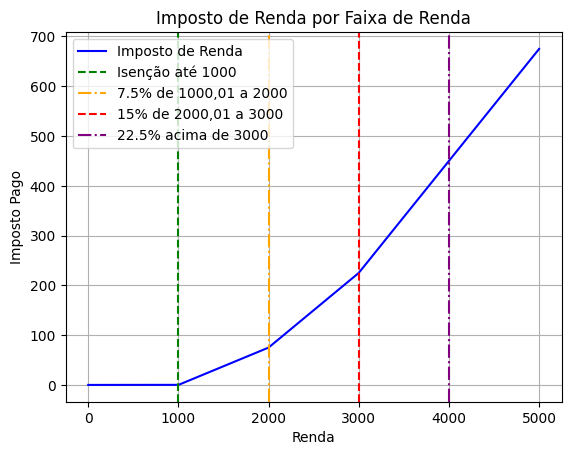

In [42]:
rendas = np.linspace(0, 5000, 500)
impostos = [imposto_renda(renda) for renda in rendas]

plt.plot(rendas, impostos, label='Imposto de Renda', color='blue')
plt.axvline(x=1000, color='green', linestyle='--', label='Isenção até 1000')
plt.axvline(x=2000, color='orange', linestyle='-.', label='7.5% de 1000,01 a 2000')
plt.axvline(x=3000, color='red', linestyle='--', label='15% de 2000,01 a 3000')
plt.axvline(x=4000, color='purple', linestyle='-.', label='22.5% acima de 3000')

plt.title('Imposto de Renda por Faixa de Renda')
plt.xlabel('Renda')
plt.ylabel('Imposto Pago')
plt.legend()

plt.grid(True)
plt.show()